# Laguage detection task

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### In this task objects will be words either in English or in French, and you will have to implement K-NN classifier predicting the language of each word by its Levenstein (edit) distance to the words in the training set.

* Download python wheel Python-Levenstein from <http://www.lfd.uci.edu/~gohlke/pythonlibs/#python-levenshtein>
* Install it with pip intall [wheel-name].
* Levenstein distance can now be computed as Levenshtein.distance(source, target)

In [2]:
import Levenshtein
import sklearn as skl
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
with open('Data/en.txt') as f:
    english = f.readlines()
    
with open('Data/fr.txt') as f:
    french = f.readlines()

In [4]:
len(english), len(french)

(164144, 191448)

In [5]:
random.seed(0)

In [6]:
english[:4]

['twist\n', 'author\n', 'charles\n', 'dickens\n']

In [7]:
french[:4]

['des\n', 'mati\n', 'res\n', 'chapitre\n']

In [8]:
random.seed(0)

In [9]:
random.shuffle(english)

In [10]:
random.shuffle(french)

#### Forming train and test sets for your task.

In [11]:
N1 = 15000
N2 = 500
X_train = english[:N1] + french[:N1]
Y_train = [1]*N1 + [2]*N1
X_test = english[N1:N1+N2] + french[N1:N1+N2]
Y_test = [1]*N2 + [2]*N2

In [12]:
inds = arange(len(X_train)) 
inds = random.permutation(inds)
X_train = [X_train[ind] for ind in inds]
Y_train = [Y_train[ind] for ind in inds]

inds = arange(len(X_test))
inds = random.permutation(inds)
X_test = [X_test[ind] for ind in inds]
Y_test = [Y_test[ind] for ind in inds]

#### Implement KNN class having constructor, fit(X,Y), predict_one(x) and predict(X) methods.

* constructor should have parameter K
* predict_one(x) predicts class for single object
* predict(X) predicts class for each row of X

You will need this class, because default implementation of K-NN 
requires objects to be numeric vectors and your objects are strings.

In [13]:
class KNN_strs:
    def __init__(self, K=3):
        self.k_neibours = K
        self.X_train = None
        self.Y_train = None
    
    def fit(self, X : list, Y : list) -> None:
        self.X_train = np.array(X)
        self.Y_train = np.array(Y)
    
    def _distance(self, x1 : str, x2 : str) -> float:
        return Levenshtein.distance(x1, x2)/(len(x1) + len(x2))
    
    def predict_one(self, x : str) -> int:
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        inds = np.argpartition(distances, self.k_neibours)
        ans = self.Y_train[inds[:self.k_neibours]]

        return np.bincount(ans).argmax()
    
    def predict(self, X : list) -> list:
        return [self.predict_one(x) for x in X]
    
    def margin_one(self, x : str, y : int) -> int:
        distances = [self._distance(x, x_train) for x_train in self.X_train if x != x_train]
        inds = np.argpartition(distances, self.k_neibours)
        ans = self.Y_train[inds[:self.k_neibours]]
        
        ans = np.bincount(ans)
        if len(ans) > y:
            correct = ans[y]
        else:
            correct = 0
        others = self.k_neibours - correct
        return correct - others
    
    def margin(self, X : list, Y : list) -> list:
        return [self.margin_one(x, y) for x, y in zip(X, Y)]

#### For K=[1,3,5,7,11,21] estimate accuracy of your KNN and plot the dependency between K and accuracy.

In [14]:
K = [1, 3, 5, 7, 11, 21]

In [15]:
len(X_train), len(X_test)

(30000, 1000)

In [16]:
%%time
scores = []

for k in K:
    knn = KNN_strs(K=k)
    knn.fit(X=X_train, Y=Y_train)
    preds = knn.predict(X_test)
    score = accuracy_score(y_true=Y_test, y_pred=preds)
    print(f'K = {k}, score = {score}')
    scores.append(score)

K = 1, score = 0.92
K = 3, score = 0.923
K = 5, score = 0.906
K = 7, score = 0.907
K = 11, score = 0.903
K = 21, score = 0.886
CPU times: user 2min 27s, sys: 15 ms, total: 2min 27s
Wall time: 2min 28s


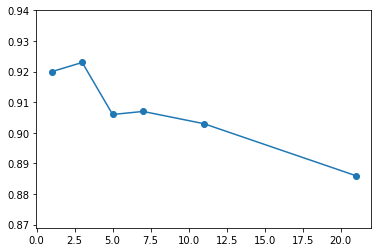

In [17]:
plt.scatter(K, scores)
plt.plot(K, scores)
plt.show()

#### What value of K is optimal? Explain

Оптимально k = 3, так как accuracy максимально (у k=1 accuracy такая высокая, так как много повторяющихся значений в тестовой и обучающей выборке).